In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec

# Cargar datos
se carga el conjunto de datos extraido de kaggel "https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024/data"

In [2]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


# Características clave
- Customer ID: Identificador único para cada cliente.
- Age: Edad del cliente (numérico).
- Gender: Género del cliente (Masculino o Femenino).
- Loyalty Member: (Sí/No). Los valores cambian con el tiempo, por lo que se debe prestar atención a quién canceló y quién se inscribió.
- Product Type: Tipo de producto electrónico vendido (por ejemplo, Smartphone, Laptop, Tablet).
- SKU: Código único para cada producto.
- Rating: Calificación del producto por parte del cliente (1-5 estrellas). (No debe haber calificaciones nulas).
- Order Status: Estado del pedido (Completado, Cancelado).
- Payment Method: Método utilizado para el pago (por ejemplo, Efectivo, Tarjeta de Crédito, Paypal).
- Total Price: Precio total de la transacción (numérico).
- Unit Price: Precio por unidad del producto (numérico).
- Quantity: Cantidad de unidades compradas (numérico).
- Purchase Date: Fecha de la compra (formato: AAAA-MM-DD).
- Shipping Type: Tipo de envío elegido (por ejemplo, Estándar, Nocturno, Exprés).
- Add-ons Purchased: Lista de cualquier artículo adicional comprado (por ejemplo, Accesorios, Garantía Extendida).
- Add-on Total: Precio total de los artículos adicionales comprados (numérico).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

## Ajustar tipos de datos
Se ajusta el campo _Custumer ID_ ya que no se debe tomar como numerico. Y se cambia el campo _Purchase Date_ a tipo fecha

In [4]:
df['Purchase Date'] =  pd.to_datetime(df['Purchase Date'])
df['Customer ID'] = df['Customer ID'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        20000 non-null  object        
 1   Age                20000 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     20000 non-null  object        
 4   Product Type       20000 non-null  object        
 5   SKU                20000 non-null  object        
 6   Rating             20000 non-null  int64         
 7   Order Status       20000 non-null  object        
 8   Payment Method     20000 non-null  object        
 9   Total Price        20000 non-null  float64       
 10  Unit Price         20000 non-null  float64       
 11  Quantity           20000 non-null  int64         
 12  Purchase Date      20000 non-null  datetime64[ns]
 13  Shipping Type      20000 non-null  object        
 14  Add-on

## Datos faltantes.
Hay datos faltantes tanto de _Gender_ como en _Add-ons Purchased_ para este último no haremos ningún tratameinto, ya que dada su descripción se evidencia que los valores nulos en este campo hacen referencia a cuando no se ha comprado un artículo adicional. Por el contrario para _Generder_ se revisa el registro que presenta el valor faltante y se determinará si es posible incluir el dato faltante o se debe eliminar el registro


In [5]:
print(df[df['Gender'].isna()])
print(len(df[df['Customer ID']=='19998']))

      Customer ID  Age Gender Loyalty Member Product Type     SKU  Rating  \
19999       19998   27    NaN            Yes       Laptop  LTP123       4   

      Order Status Payment Method  Total Price  Unit Price  Quantity  \
19999    Completed  Bank Transfer       674.32      674.32         1   

      Purchase Date Shipping Type Add-ons Purchased  Add-on Total  
19999    2024-01-29     Expedited               NaN           0.0  
1


Al solo ser un valor se decide elimnarlo ya que no se encontró alguna referencia que permitiera incluir el dato

In [6]:
df = df[~df['Gender'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        19999 non-null  object        
 1   Age                19999 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     19999 non-null  object        
 4   Product Type       19999 non-null  object        
 5   SKU                19999 non-null  object        
 6   Rating             19999 non-null  int64         
 7   Order Status       19999 non-null  object        
 8   Payment Method     19999 non-null  object        
 9   Total Price        19999 non-null  float64       
 10  Unit Price         19999 non-null  float64       
 11  Quantity           19999 non-null  int64         
 12  Purchase Date      19999 non-null  datetime64[ns]
 13  Shipping Type      19999 non-null  object        
 14  Add-ons Pur

Se verifica que no se tengan datos duplicados y cuales son los valores únicos de cada columna

In [7]:
df.duplicated().sum()

0

In [8]:
unicos = {col: df[col].unique() for col in df.columns}
for col, values in unicos.items():
    print(f'Columna:{col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}')
    print('-'*50)

Columna:Customer ID
Número de valores únicos: 12135
Valores únicos: ['1000' '1002' '1003' '1004' '1005' '1006' '1007' '1008' '1011' '1013']
--------------------------------------------------
Columna:Age
Número de valores únicos: 63
Valores únicos: [53 41 75 25 24 35 66 72 42 73]
--------------------------------------------------
Columna:Gender
Número de valores únicos: 2
Valores únicos: ['Male' 'Female']
--------------------------------------------------
Columna:Loyalty Member
Número de valores únicos: 2
Valores únicos: ['No' 'Yes']
--------------------------------------------------
Columna:Product Type
Número de valores únicos: 5
Valores únicos: ['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']
--------------------------------------------------
Columna:SKU
Número de valores únicos: 10
Valores únicos: ['SKU1004' 'SKU1002' 'SKU1005' 'SKU1001' 'SKU1003' 'LTP123' 'SMP234'
 'TBL345' 'HDP456' 'SWT567']
--------------------------------------------------
Columna:Rating
Número de valo

# Campos calculados

Con el fin de facilitar el análisis se crean algunos campos adicionales.

In [9]:
df['Total_SKU_AddOn'] = df['Total Price'] + df['Add-on Total']
df['Año'] = df['Purchase Date'].dt.year
df['Mes'] = df['Purchase Date'].dt.month
df['Trimestre'] = df['Purchase Date'].dt.quarter
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Total_SKU_AddOn,Año,Mes,Trimestre
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,5578.54,2024,3,1
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18,2024,4,2
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,1855.84,2023,10,4
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92,2024,8,3
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06,2024,5,2


In [10]:
# Productos vendidos por mes
ventas_año_mes = df.groupby(['Año','Mes'])['Total Price'].sum()
print("Las ventas por año y mes de productos ha sido las siguientes: \n" , ventas_año_mes)

Las ventas por año y mes de productos ha sido las siguientes: 
 Año   Mes
2023  9       481961.79
      10     2318466.35
      11     2068434.14
      12     1980700.33
2024  1      6619498.15
      2      5733696.06
      3      6324367.84
      4      6418253.62
      5      6709042.93
      6      6668633.59
      7      6535129.52
      8      6706118.61
      9      5037691.12
Name: Total Price, dtype: float64


In [11]:
 # Accesorios vendidos por mes
ventasAdd_año_mes = df.groupby(['Año','Mes'])['Add-on Total'].sum()
print("Las ventas por año y mes de Accesorios ha sido las siguientes: \n" , ventasAdd_año_mes)

Las ventas por año y mes de Accesorios ha sido las siguientes: 
 Año   Mes
2023  9        8012.62
      10      37837.12
      11      34888.81
      12      33509.15
2024  1      136195.16
      2      120148.92
      3      124954.26
      4      123973.59
      5      132018.51
      6      126689.59
      7      132017.20
      8      135133.14
      9       99518.89
Name: Add-on Total, dtype: float64


Al analizar los valores de ventas tanto para los productos como para los accesorios, se evidencia que septiembre de 2023 presenta cifras significativamente más bajas en comparación con otros meses. Aunque el conjunto de datos no especifica si los valores asociados a este mes están incompletos, se decide excluirlo del análisis. De esta manera, trabajaremos con un año completo de datos de manera más consistente.

In [12]:
sep_2023 = (df['Año'] == 2023) & (df['Mes'] == 9)
df= df[~sep_2023]

In [13]:
# Productos vendidos por mes
ventas_año_mes = df.groupby(['Año','Mes'])['Total Price'].sum()
print("Las ventas por año y mes de productos ha sido las siguientes: \n" , ventas_año_mes)

# Accesorios vendidos por mes
ventasAdd_año_mes = df.groupby(['Año','Mes'])['Add-on Total'].sum()
print("Las ventas por año y mes de Accesorios ha sido las siguientes: \n" , ventasAdd_año_mes)

Las ventas por año y mes de productos ha sido las siguientes: 
 Año   Mes
2023  10     2318466.35
      11     2068434.14
      12     1980700.33
2024  1      6619498.15
      2      5733696.06
      3      6324367.84
      4      6418253.62
      5      6709042.93
      6      6668633.59
      7      6535129.52
      8      6706118.61
      9      5037691.12
Name: Total Price, dtype: float64
Las ventas por año y mes de Accesorios ha sido las siguientes: 
 Año   Mes
2023  10      37837.12
      11      34888.81
      12      33509.15
2024  1      136195.16
      2      120148.92
      3      124954.26
      4      123973.59
      5      132018.51
      6      126689.59
      7      132017.20
      8      135133.14
      9       99518.89
Name: Add-on Total, dtype: float64


# Graficos

Con el fin de enteder los datos y extraer infomración relevante vamos a graficarlos.

In [14]:
cancelado = df['Order Status'] == 'Cancelled'
completado = df['Order Status'] == 'Completed'

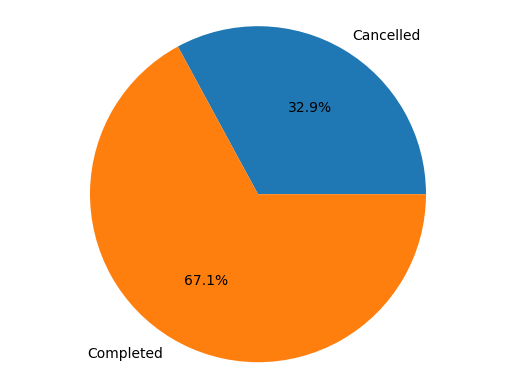

In [15]:

df_Orden_Group = df.groupby('Order Status')['Total_SKU_AddOn'].sum()

plt.pie(df_Orden_Group,labels= df_Orden_Group.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


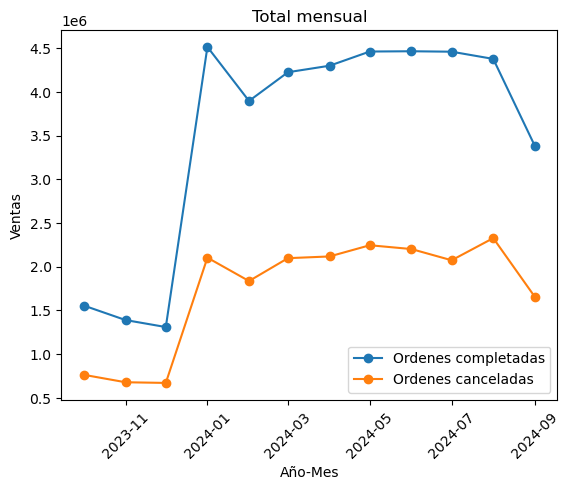

In [16]:
total_completado = df.groupby((df[completado]['Purchase Date'].dt.to_period('M')).dt.to_timestamp())['Total Price'].sum()
total_cancelado = df.groupby((df[cancelado]['Purchase Date'].dt.to_period('M')).dt.to_timestamp())['Total Price'].sum()
plt.plot(total_completado.index,total_completado, marker = 'o', label = 'Ordenes completadas')
plt.plot(total_cancelado.index,total_cancelado, marker = 'o', label = 'Ordenes canceladas')
plt.xticks(rotation=45)
plt.title('Total mensual')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Podemos observar mediante los graficos anteriores que las ordenes canceladas son una parte significativa del total de ordenes con casi el 33%, además al observar su comportamiento, vemos que es muy similar al de las ordenes completadas, por lo cual sería interesante generar campañas o inciativas, que mitiguen las ordenes canceladas.

Dada la oprtunidad de mejorar en ese la cantidad de ordenes canceladas, se continua explorando estos datos.

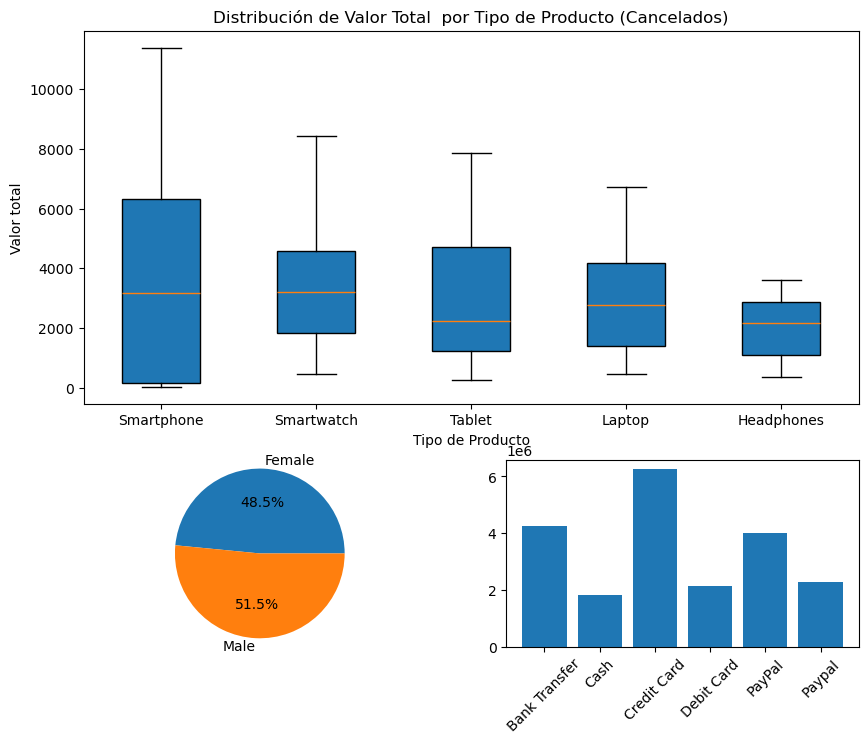

In [32]:
gs = gridspec.GridSpec(2,2, height_ratios=[2,1], width_ratios=[1,1])
fig = plt.figure(figsize=(10,8))

df_cancelado = df[cancelado]

ax1 = fig.add_subplot(gs[0, :])

cancelado_producto = [df_cancelado[df_cancelado['Product Type'] == producto]['Total Price'] 
                     for producto in df_cancelado['Product Type'].unique()]

ax1.boxplot(cancelado_producto, labels=df_cancelado['Product Type'].unique(), patch_artist=True)
ax1.set_title('Distribución de Valor Total  por Tipo de Producto (Cancelados)')
ax1.set_xlabel('Tipo de Producto')
ax1.set_ylabel('Valor total')

df_OrdenCancelado_Group = df_cancelado.groupby('Gender')['Total Price'].sum()

ax2 = fig.add_subplot(gs[1,0])
ax2.pie(df_OrdenCancelado_Group,labels= df_OrdenCancelado_Group.index, autopct='%1.1f%%')
ax2.axis('equal')

grupo_pago = df_cancelado.groupby('Payment Method')['Total Price'].sum()
ax3 = fig.add_subplot(gs[1,1])
ax3.bar(grupo_pago.index,grupo_pago)

plt.xticks(rotation=45)

plt.show()


En cuanto a las categorías con órdenes canceladas, las que presentan el valor medio más alto son _Smartphone_ y _Smartwatch_. Sin embargo, los valores de la primera categoría muestran una mayor dispersión. Respecto al género, se observa una leve inclinación hacia el género masculino en términos del valor asociado a las cancelaciones de órdenes. Por último, el método de pago con mayor valor de cancelaciones es la tarjeta de crédito.